In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
from beamline34IDC.optimization import movers, configs, display_utils, common as opt_common
from beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
import beamline34IDC.optimization.movers as movers

from beamline34IDC.optimization.display_utils import LivePlotCallback
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import shutil
import glob
import IPython
from skopt.callbacks import DeltaXStopper, DeltaYStopper, DeadlineStopper

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

65807


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [6]:
os.mkdir(temp_work_dir)

In [7]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [8]:
os.chdir(temp_work_dir)

In [9]:
input_beam_path = "primary_optics_system_beam.dat"

In [10]:
move_motors = ['hkb_4', 'vkb_4']

In [11]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [12]:
# Focusing Optics System -------------------------
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [13]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0. 0.]


In [14]:
deltax = np.inf
for mt in move_motors:
    deltax = np.minimum(deltax, configs.DEFAULT_MOTOR_TOLERANCES[mt] / configs.DEFAULT_MOTOR_RESOLUTIONS[mt])

  0%|          | 0/5 [00:00<?, ?it/s]

Initial motor positions are [-0.00717874 -0.07959881]
[array([-201,  200]), array([-201,  200])]
Initial loss is 0.08002627049003994


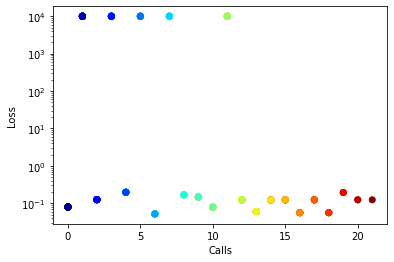

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has

Loss is 0.052064466243628905 for x [-44, 69] and min acceptable value is 0.0002
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.08002627049003994
initial guess is [0.059347092150643294, 0.08159200976615388]


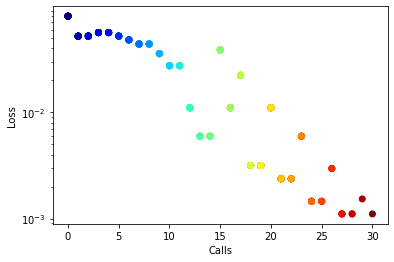

 20%|██        | 1/5 [03:14<12:56, 194.09s/it]

Test 0 success False
Initial motor positions are [-0.04495402 -0.05928257]
[array([-201,  200]), array([-201,  200])]
Initial loss is 0.07397704473169713


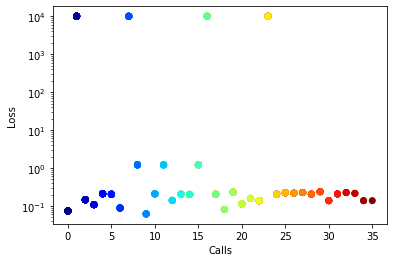

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Po

Loss is 0.06168194225350666 for x [26, 118] and min acceptable value is 0.0002
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.07397704473169713
initial guess is [0.06193200268952531, 0.050857474824456766]


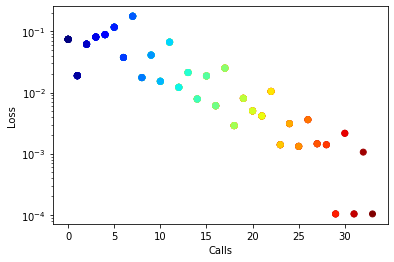

 40%|████      | 2/5 [07:40<11:49, 236.37s/it]

Test 1 success True
Initial motor positions are [ 0.0729697  -0.02511992]
[array([-201,  200]), array([-201,  200])]
Initial loss is 0.07694942426672725


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


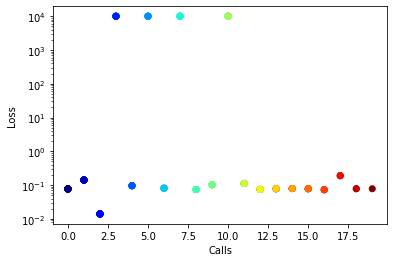

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Loss is 0.013994327933015499 for x [-87, 25] and min acceptable value is 0.0002
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.07694942426672725
initial guess is [0.07026410213537346, -0.0036192585663209487]


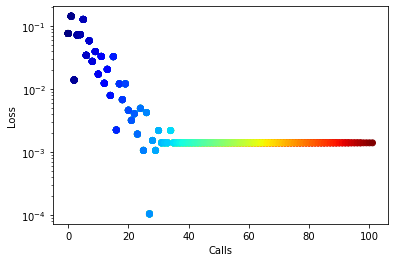

 60%|██████    | 3/5 [15:14<11:11, 335.74s/it]

Test 2 success True
Initial motor positions are [-0.0371927   0.03995399]
[array([-201,  200]), array([-201,  200])]
Initial loss is 0.054260868323656994


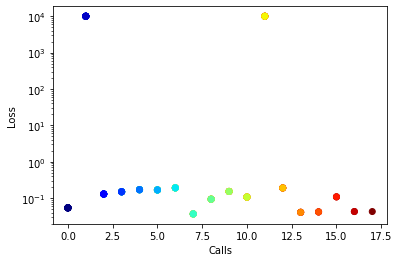

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Loss is 0.036910542111952334 for x [74, -40] and min acceptable value is 0.0002
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.054260868323656994
initial guess is [-0.04859177484104371, 0.08705161685839746]


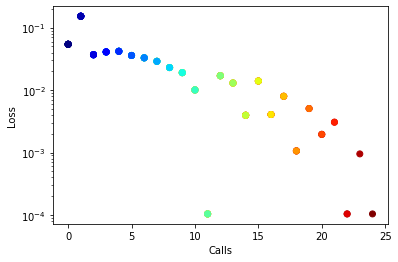

 80%|████████  | 4/5 [18:02<04:29, 269.60s/it]

Test 3 success True
Initial motor positions are [-0.09817208 -0.08948433]
[array([-201,  200]), array([-201,  200])]
Initial loss is 0.1320317434150308


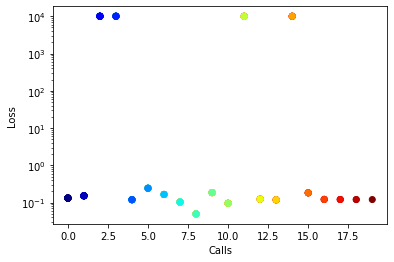

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Loss is 0.04968910732454931 for x [125, 131] and min acceptable value is 0.0002
Solution is not acceptable.
Trying Nelder-Mead from minimum position


 80%|████████  | 4/5 [19:17<04:49, 289.44s/it]


KeyboardInterrupt: 

In [28]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []
skopt_results = []
scipy_results = []
skopt_losses = []
scipy_losses = []
skopt_mots = []
scipy_mots = []

for outer in tqdm(range(N_RUNS)):
    translations = np.random.uniform(-0.1, 0.1, size=2)
    test_absolute_movements = initial_absolute_positions + translations
    print("Initial motor positions are", test_absolute_movements)

    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    absolute_movements.append(test_absolute_movements)
    initial_centroids.append(centroid)
    initial_out_beams.append(out_beam)


    opt_trial = SkoptDiscreteGPOptimizer(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=test_absolute_movements, 
                                          random_seed=DEFAULT_RANDOM_SEED)
    
    
    deltax_callback = DeltaXStopper(deltax)
    deadline_callback = DeadlineStopper(180)
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    plot_callback = display_utils.LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call, deltax_callback, deadline_callback])
                                    #xi=5e-4, kappa=0.1, n_calls=50)
    opt_results, guesses, solution, success = opt_trial.trials(verbose=False)
    
    skopt_results.append(opt_results)
    skopt_losses.append(opt_trial._opt_trials_losses)
    skopt_mots.append(opt_trial._opt_trials_motor_positions)
    
    focusing_system = opt_trial.focusing_system
    plot_callback.close()

    if not success:
        sort_args = np.argsort(opt_results[0].func_vals)
        x_simplex = np.array(opt_results[0].x_iters)[sort_args[:len(move_motors) +  1]]
        x_simplex = [opt_trial.transform_to_float(move_motors, xs) for xs in x_simplex]
        
        
        print('Trying Nelder-Mead from minimum position')
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED)
        plot_callback = display_utils.LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call, initial_simplex=x_simplex)
        
        initial_guess = []
        for mi, mt in enumerate(move_motors):
            initial_guess.append(solution[mi] * configs.DEFAULT_MOTOR_RESOLUTIONS[mt])
                                                                                
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=initial_guess, verbose=False)
        scipy_losses.append(opt_trial._opt_trials_losses)
        scipy_mots.append(opt_trial._opt_trials_motor_positions)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        scipy_results.append(scipy_results)
    
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [121]:
??get_shadow_beam_spatial_distribution

Signature:
get_shadow_beam_spatial_distribution(
    shadow_beam,
    nbins=201,
    nolost=1,
    xrange=None,
    yrange=None,
    do_gaussian_fit=False,
)
Docstring: <no docstring>
Source:   
def get_shadow_beam_spatial_distribution(shadow_beam, nbins=201, nolost=1, xrange=None, yrange=None, do_gaussian_fit=False):
    return __shadow_beam_get_distribution_info(shadow_beam._beam.histo2(1, 3, nbins=nbins, nolost=nolost, xrange=xrange, yrange=yrange), do_gaussian_fit=do_gaussian_fit)
File:      /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/beamline34IDC/util/shadow/common.py
Type:      function


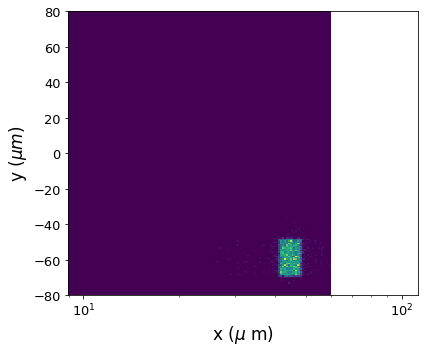

In [128]:
hist, dw = get_shadow_beam_spatial_distribution(initial_out_beams[1], xrange=(-0.06, 0.06), yrange=(-0.08, 0.08))

plt.figure(figsize=[6,5])
plt.pcolormesh(hist.hh * 1000, hist.vv * 1000, hist.data_2D)
plt.xlabel(r'x ($\mu$ m)', fontsize=17)
plt.ylabel(r'y ($\mu m$)', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xscale('log')
#plt.gca().set_aspect('equal')
plt.tight_layout()

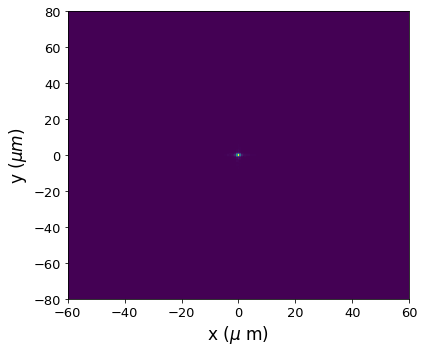

In [127]:
hist, dw = get_shadow_beam_spatial_distribution(final_out_beams[1], xrange=(-0.06, 0.06), yrange=(-0.08, 0.08))
plt.figure(figsize=[6,5])
plt.pcolormesh(hist.hh * 1000, hist.vv * 1000, hist.data_2D)
plt.xlabel(r'x ($\mu$ m)', fontsize=17)
plt.ylabel(r'y ($\mu m$)', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.gca().set_aspect('equal')
plt.tight_layout()

In [56]:
from matplotlib.colors import Normalize, LogNorm

In [57]:
??LogNorm

Init signature: LogNorm(vmin=None, vmax=None, clip=False)
Source:        
class LogNorm(Normalize):
    """Normalize a given value to the 0-1 range on a log scale."""

    def autoscale(self, A):
        # docstring inherited.
        super().autoscale(np.ma.array(A, mask=(A <= 0)))

    def autoscale_None(self, A):
        # docstring inherited.
        super().autoscale_None(np.ma.array(A, mask=(A <= 0)))
File:           ~/.conda/envs/oasys_env/lib/python3.7/site-packages/matplotlib/colors.py
Type:           type
Subclasses:     


In [119]:
norm1 = LogNorm()(1 - np.clip(skopt_losses[1], a_min=0, a_max=1))
norm2 = LogNorm()(1 - np.array(scipy_losses[1]))

In [117]:
norm3 = Normalize()(skopt_losses[1]) / 2

In [78]:
norm4 = 0.5 + (Normalize()(np.arange(len(scipy_losses[1]))) / 2)

Text(0, 0.5, 'vkb trans (mm)')

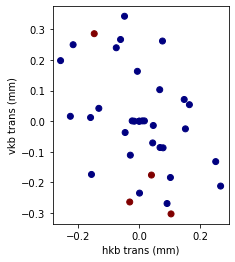

In [120]:
plt.scatter(*np.array(skopt_mots[1]).T, c=norm3, cmap='jet')#'r', alpha=norm3)#(np.clip(skopt_losses[1], a_min=0, a_max=1)))
#plt.scatter(*np.array(scipy_mots[1]).T, c=norm4, cmap='jet')#'b', alpha=norm2)#(1-np.array(scipy_losses[1])))
#plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlabel(r'hkb trans (mm)')
plt.ylabel('vkb trans (mm)')

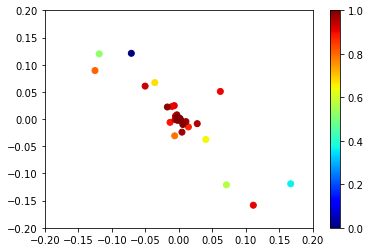

In [68]:
plt.scatter(*np.array(scipy_mots[1]).T, c=norm2, cmap='jet')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2,0.2)
plt.colorbar()

In [ ]:
plt.plot(losses, 

In [21]:
opt_trial._opt_trials_losses

[0.09625061607782141]

In [48]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [49]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [50]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [51]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

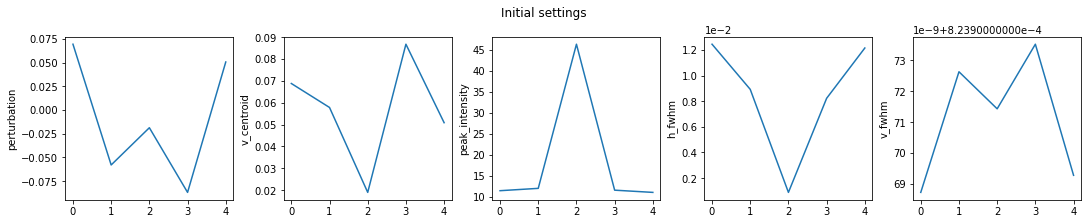

In [52]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

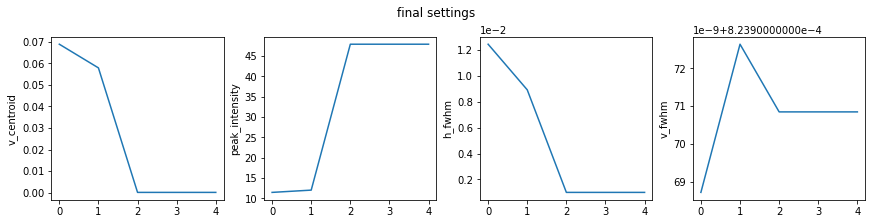

In [53]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

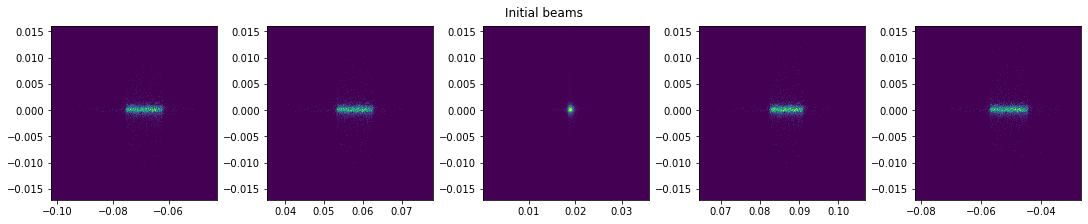

In [54]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

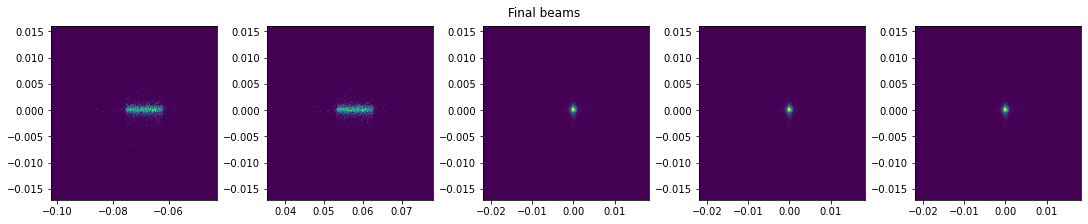

In [55]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')